In [1]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image

from ip_adapter import IPAdapterXL

/home/tiger/miniconda3/envs/fast-dpm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-29 14:00:25.239598: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 14:00:25.273555: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
base_model_path = "/mnt/bn/ic-research-aigc-editing/fast-diffusion-models/assets/public_models/StableDiffusion/stable-diffusion-xl-base-1.0"
image_encoder_path = "sdxl_models/image_encoder"
ip_ckpt = "sdxl_models/ip-adapter_sdxl.bin"
device = "cuda"

In [3]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [4]:
# load SDXL pipeline
pipe = StableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    add_watermarker=False,
)

Loading pipeline components...: 100%|██████████| 7/7 [00:13<00:00,  1.95s/it]


In [5]:
# load ip-adapter
ip_model = IPAdapterXL(pipe, image_encoder_path, ip_ckpt, device)

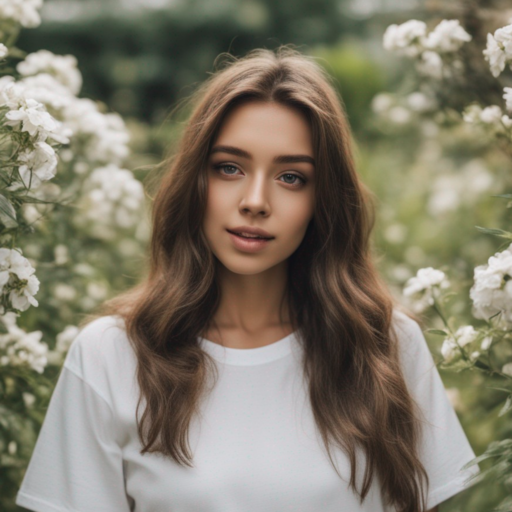

In [9]:
# read image prompt
# image = Image.open("assets/images/woman.png")
image = Image.open("assets/images/girl.png")
image.resize((512, 512))

100%|██████████| 30/30 [00:13<00:00,  2.17it/s]


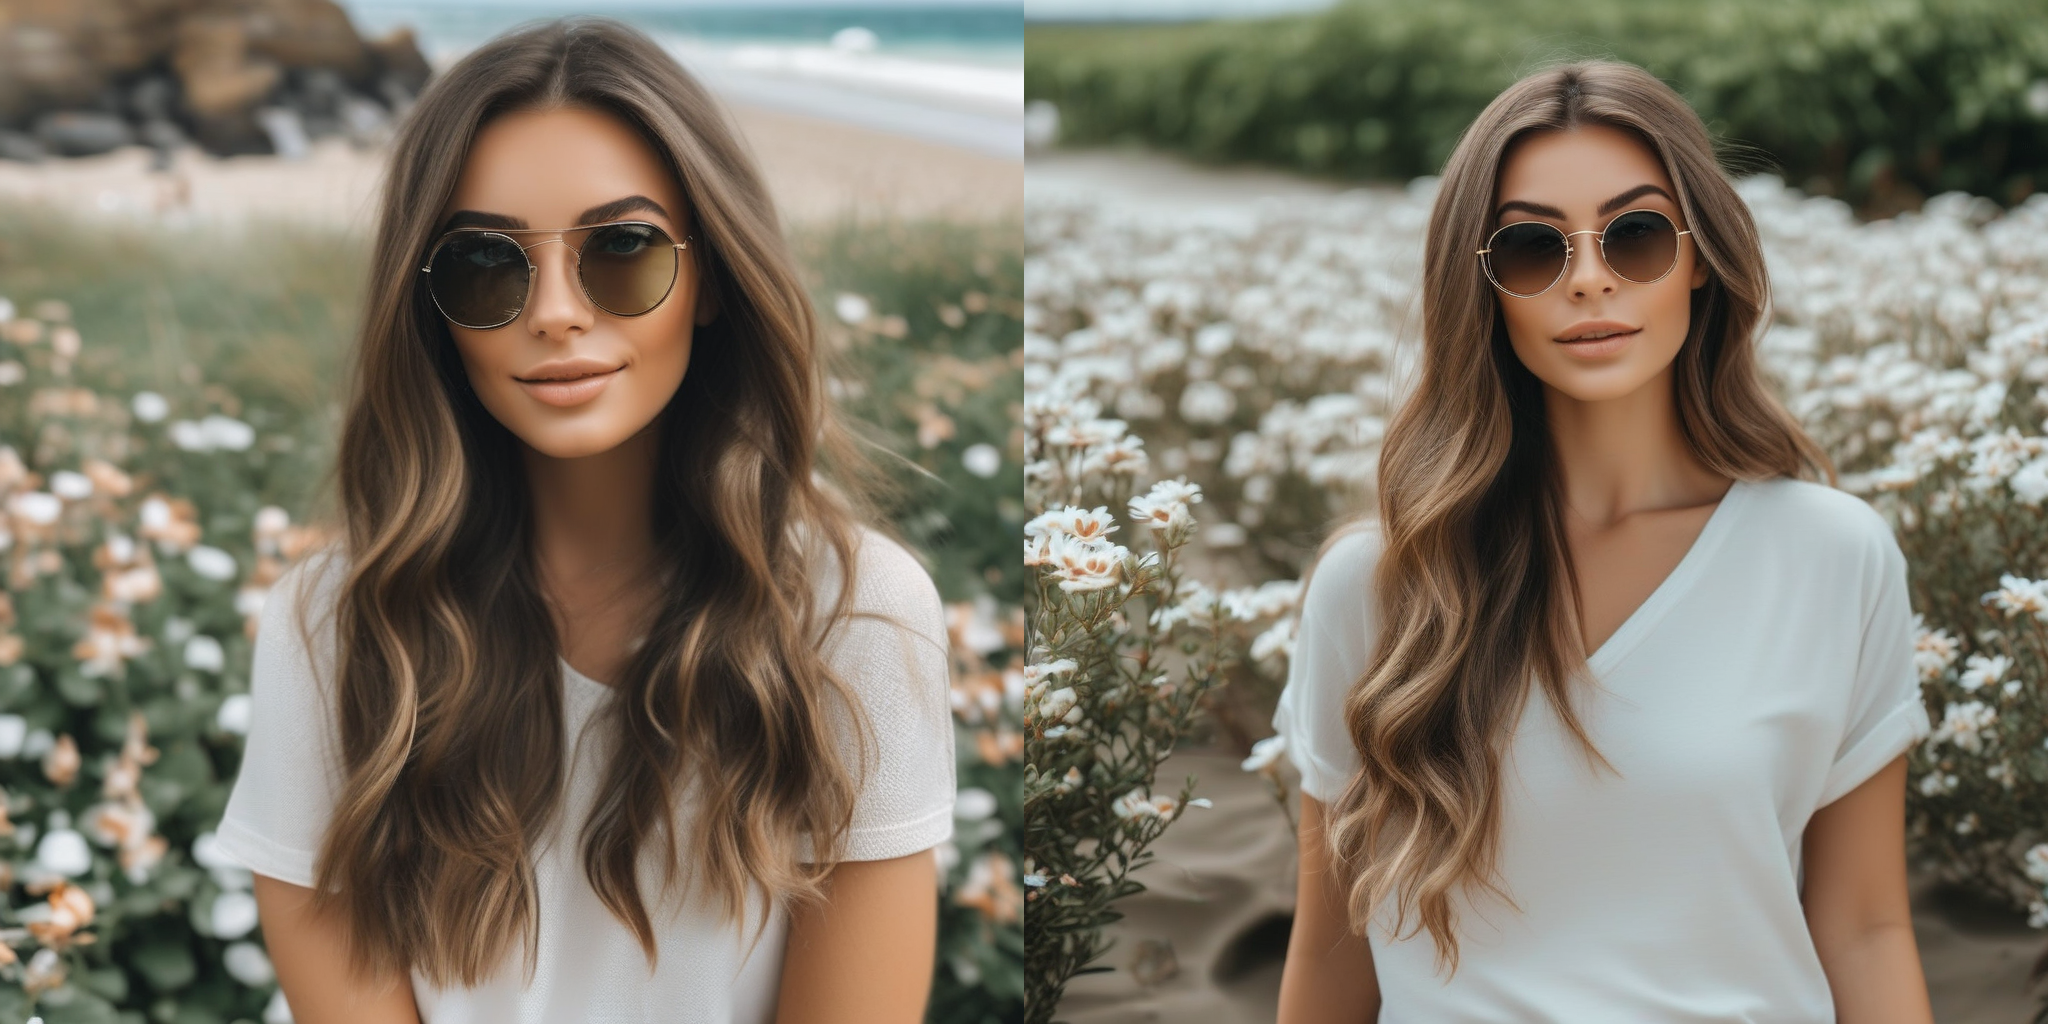

In [10]:
# generate image variations with only image prompt
num_samples = 2
# images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=420)
# grid = image_grid(images, 1, num_samples)
# grid

# multimodal prompts
images = ip_model.generate(pil_image=image, num_samples=num_samples, num_inference_steps=30, seed=420,
        prompt="best quality, high quality, wearing sunglasses on the beach", scale=0.6)
grid = image_grid(images, 1, num_samples)
grid